# DATA SCIENCE PROJECT ON RICE LEAF DISEASE DETECTOR


**TEAM CODE:** PTID-CDS-SEP-22-1377

**PROJECT CODE:** PRCP-1004-RiceLeaf Disease

**DATA COLLECTION:** DATA PROVIDED BY DATAMITES FOR CAPSTONE PROJECT

## BUISNESS CASE :- BASED ON GIVEN IMAGES OF DATASET WE NEED TO PREDICT THE DISEASE OF RICE LEAF BY USING CNN 

# INTRODUCTION  :-

The rice leaf suffers from several bacterial, viral, or fungal diseases and these diseases reduce rice production significantly. To sustain rice demand for a vast population globally.The rice leaves related diseases often pose threats to the sustainable production of rice affecting many farmers around the world. Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population.


## RICE LEAF DISEASE :-

### 1. Leaf Smut :-

Leaf Smut, Caused by the fungus. The Fungus produces slightly raised, angular, black spots on both sides of the leaves. Although rare, it also can produce spots on leaf sheaths. The black spots are about  0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.

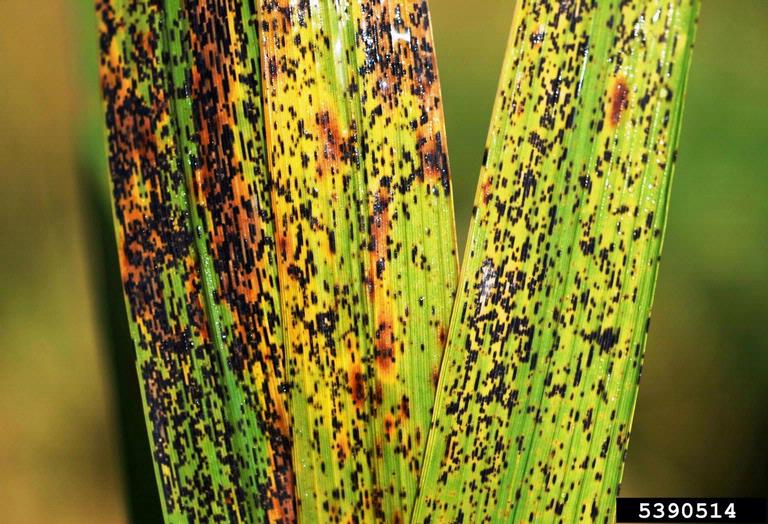

### 2. Brown Spot :-

Brown spot has been histroically largely ignored as one of the most common and most damaging rice diseases. Its most observable damage is the numberous big spots on the leaves which can kill the whole leaf.  Infected seedlings have small, circular, yellow brown or brown lesions that may girdle the coleoptile.

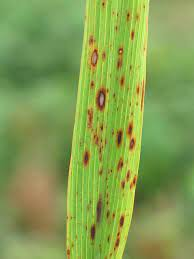


### 3. Bacterial Leaf Blight :-

Bacterial blight is caused by  wilting of seedlings and yellowing and drying if leaves. It is commonly observed when strong winds and continuous heavy rains occur, allowing the disease-causing bacteria to easily spread. In general, the disease favors temperatures at 25-34 degree Celsius, With relative humidity above 70%.


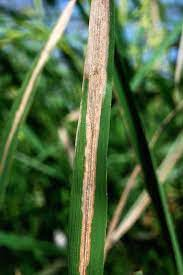

##  DATA SUMMARY :-

*This dataset contains 119 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images for Brown Spot, 40 images for Bacterial Leaf Blight, 39 images for Leaf Smut.*

**Class :-**

  1. **Leaf Smut**
  2. **Brown Spot**
  3. **Bacterial Leaf Blight**

### WE HAVE DEVICE THE PROJECT INTO MULTIPLE STEPS  :-

* Importing library
* Loading data
* Preparing data
* Data Processing
* Model building
* Training
* Evaluation
* Testing

# PYTHON IMPLIMENTATION :-

## IMPORTING NECESSARY LIBRARY :-

In [25]:

import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Make Subset Of Training Validation And Testing 

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/riceLeaf/data',output='subset',seed=1334,ratio=(.8,0.1,0.1))

Copying files: 119 files [00:35,  3.36 files/s]


## Prepare Training, Testing And Validation Data 

In [5]:
# Sorting the path of data into veriable
train_dir = '/content/subset/train'  #Location of training images
validation_dir = '/content/subset/val' # Location of test images
test_dir ='/content/subset/test' # Location of test images

In [7]:
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

val_datagen = ImageDataGenerator( rescale=(1./255))
            

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


* After loading data 95 images for training, 13 images for testing, & 11 images for validation.

## Define the CNN Model Architecture

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180, 180, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Compile the Model 

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Train the Model 

In [18]:
   
#  epochs used to how many itertion (1fp + loss + 1bp)
# train the model

history = model.fit_generator(train_generator,
    epochs=40, 
    validation_data = val_generator,
)

Epoch 1/40
6/6 [==============================] - 4s 658ms/step - loss: 0.2222 - accuracy: 0.9053 - val_loss: 0.5222 - val_accuracy: 0.8182
Epoch 2/40
6/6 [==============================] - 4s 607ms/step - loss: 0.2237 - accuracy: 0.9158 - val_loss: 0.5427 - val_accuracy: 0.8182
Epoch 3/40
6/6 [==============================] - 4s 575ms/step - loss: 0.2015 - accuracy: 0.9368 - val_loss: 0.5106 - val_accuracy: 0.7273
Epoch 4/40
6/6 [==============================] - 4s 591ms/step - loss: 0.1816 - accuracy: 0.9579 - val_loss: 0.3152 - val_accuracy: 0.8182
Epoch 5/40
6/6 [==============================] - 4s 591ms/step - loss: 0.2004 - accuracy: 0.9368 - val_loss: 0.4062 - val_accuracy: 0.8182
Epoch 6/40
6/6 [==============================] - 4s 596ms/step - loss: 0.2379 - accuracy: 0.9053 - val_loss: 0.3470 - val_accuracy: 0.8182
Epoch 7/40
6/6 [==============================] - 4s 602ms/step - loss: 0.4075 - accuracy: 0.8211 - val_loss: 0.6535 - val_accuracy: 0.6364
Epoch 8/40
6/6 [====

####  After Training :-  
   * Training accuracy :- 91.58%
   *  Validation accuracy :- 90.91%

## Model Saving :-

In [19]:
model.save("cnnmodel.hdf5")

## Plot Accuracy And Losses :-

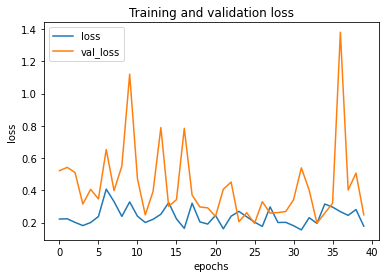

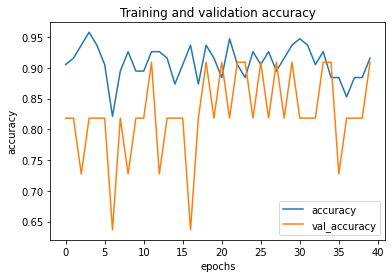

In [34]:
# Plot The Loss :-
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Plot The Accuracy :-
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

## Created Model Summary :-

In [37]:
model = tf.keras.models.load_model("cnnmodel.hdf5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Evaluation And Testing Model :-

In [38]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 781ms/step - loss: 0.3142 - accuracy: 0.8462


[0.3142251670360565, 0.8461538553237915]

* Here the loss is 0.31 and the accuracy of the model is 0.8462 percent means 84.62%.

##  Visualise the prediction of the model

1/1 [==============================] - 0s 14ms/step


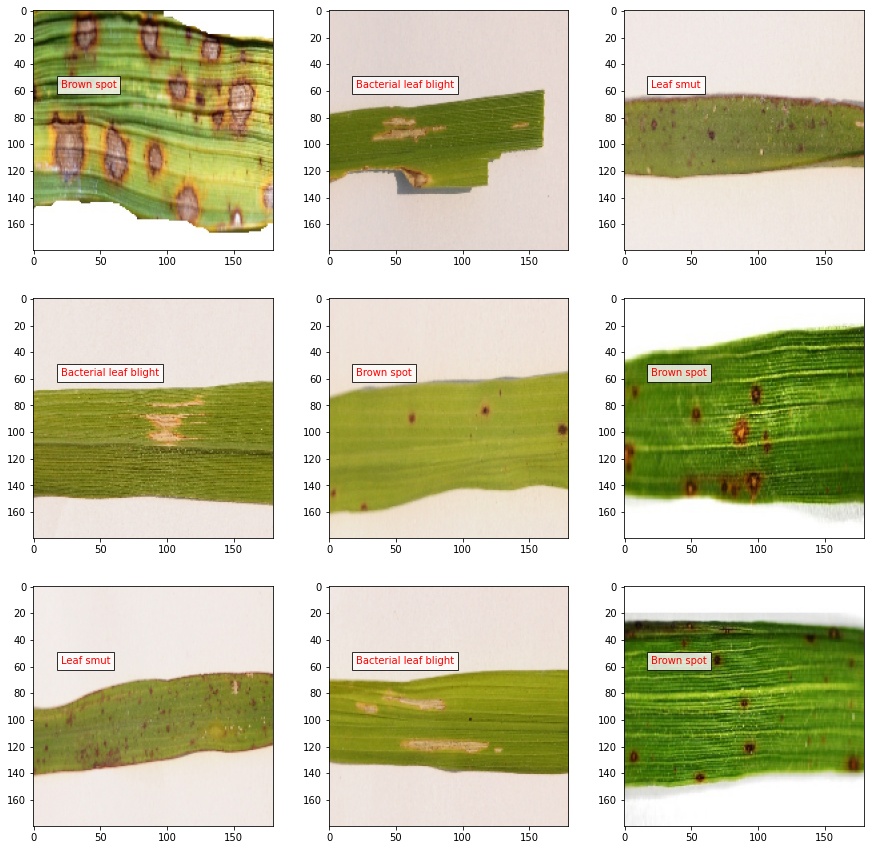

In [39]:
# Visualise the prediction of the model

# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])